In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,20
from biokit.viz import corrplot

Creating directory /home/nbuser/.config/biokit 
Creating directory /home/nbuser/.config/bioservices 


In [118]:
# Getting the dataset
dataset = pd.read_csv("spotify.csv")
dataset.head(n = 10)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.9310,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.000000,0.0924,0.8130,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.8460,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.000014,0.1640,0.4460,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.055200,0.000000,0.1670,0.8110,80.924,288600.0,4.0
5,7KXjTSCq5nL1LoYtL7XAw,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.4000,150.020,177000.0,4.0
6,3eR23VReFzcdmS7TYCrhC,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533,0.0,-6.596,1.0,0.0706,0.119000,0.000000,0.0864,0.5150,99.968,220781.0,4.0
7,3B54sVLJ402zGa6Xm4YGN,Unforgettable,French Montana,0.726,0.769,6.0,-5.043,1.0,0.1230,0.029300,0.010100,0.1040,0.7330,97.985,233902.0,4.0
8,0KKkJNfGyhkQ5aFogxQAP,That's What I Like,Bruno Mars,0.853,0.560,1.0,-4.961,1.0,0.0406,0.013000,0.000000,0.0944,0.8600,134.066,206693.0,4.0
9,3NdDpSvN911VPGivFlV5d,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,0.735,0.451,0.0,-8.374,1.0,0.0585,0.063100,0.000013,0.3250,0.0862,117.973,245200.0,4.0


In [119]:
# Get shape of the dataset
dataset.shape

(100, 16)

In [120]:
# Get column names of the dataset
dataset.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [121]:
# Get the datatype of columns in DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


## Top Artists of 2017

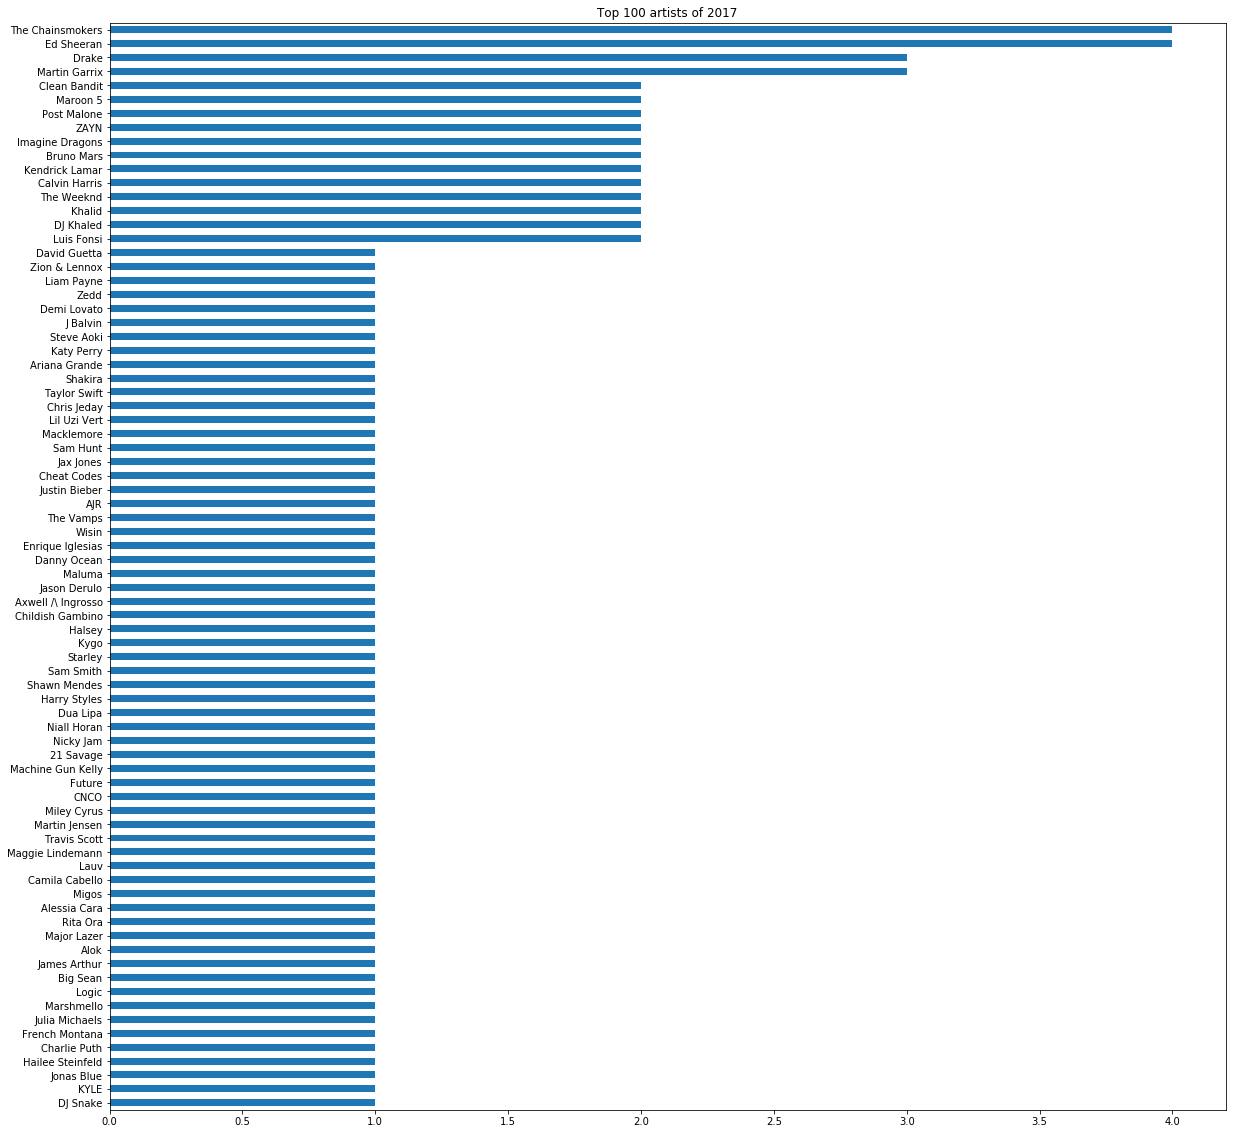

In [122]:
top_artists = dataset['artists'].value_counts()
plt.title('Top 100 artists of 2017')
top_artists.plot.barh().invert_yaxis()

It seems that **The Chainsmokers** and **Ed Sheeran** produced the maximum number of hit songs.

## Which songs of The Chainsmokers and Ed Sheeran are in Top 100 ?

In [123]:
ed_sheeran = dataset.artists == "Ed Sheeran"

In [124]:
ed_sheeran_songs = dataset[ed_sheeran]

In [125]:
print(ed_sheeran_songs.name)

0           Shape of You
17    Castle on the Hill
26           Galway Girl
40               Perfect
Name: name, dtype: object


In [126]:
the_chainsmokers = dataset.artists == "The Chainsmokers"
the_chainsmokers_songs = dataset[the_chainsmokers]
print(the_chainsmokers_songs.name)

3     Something Just Like This
11                       Paris
28                      Closer
96           Don't Let Me Down
Name: name, dtype: object


### For Ed Sheeran:
* Shape of You
* Castle on the Hill
* Galway Girl
* Perfect

### For The Chainsmokers:
* Something Just Like This
* Paris
* Closer
* Don't Let Me Down

are the songs which made it in Top 100.

## Top Artists of 2017 by Playing Time

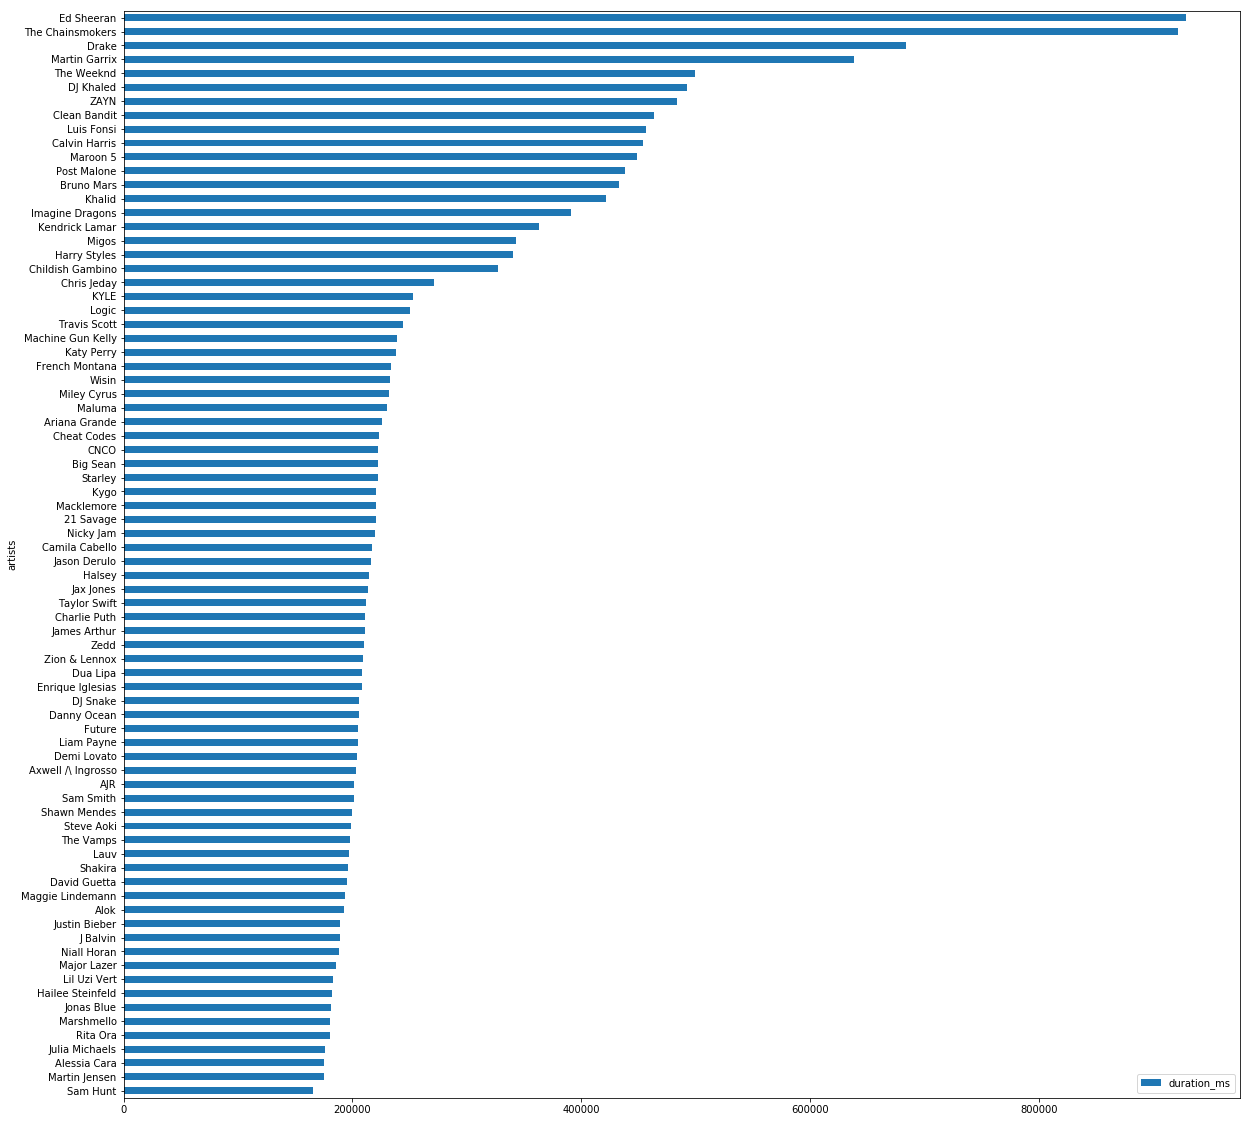

In [127]:
top_artists_by_playing_time = dataset[['artists', 'duration_ms']].groupby('artists').agg('sum')
top_artists_by_playing_time = top_artists_by_playing_time.sort_values(by = 'duration_ms', ascending = False)
top_artists_by_playing_time.plot.barh().invert_yaxis()

## Correlation between different features

Computing correlation


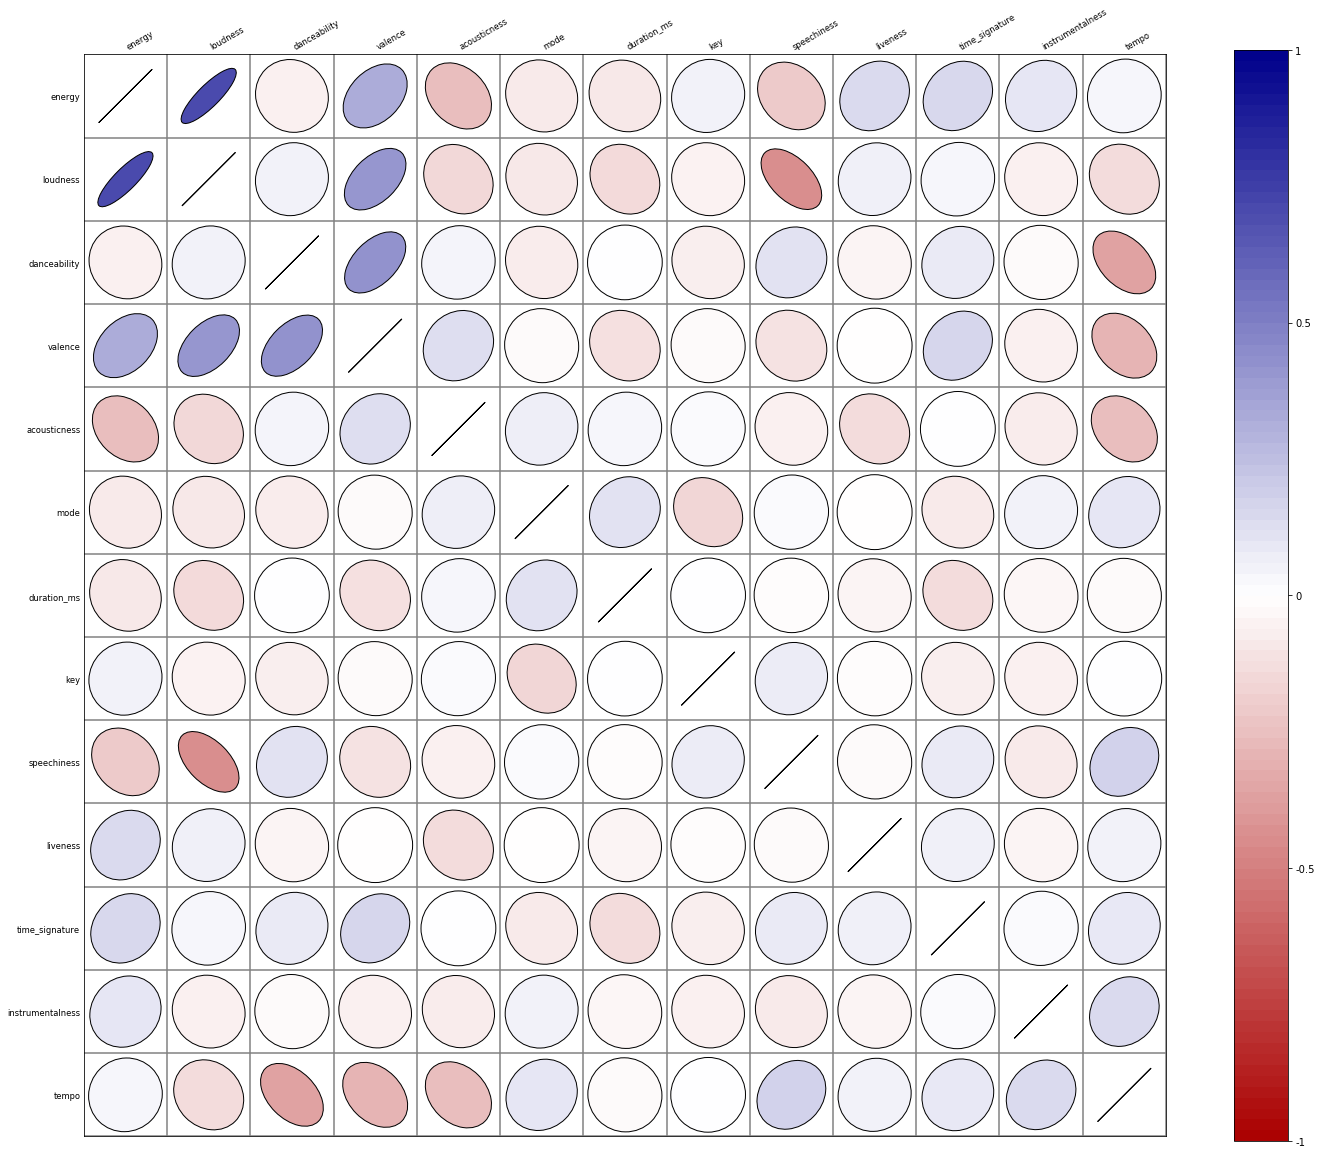

In [131]:
# Initialise Corrplot() from biokit package
c = corrplot.Corrplot(dataset.iloc[:, 3:16])
c.plot()

The following points are evident after plotting corrplot:
* **loudness** and **energy** are highly positively correlated
* **valence** is positively correlated with **loudness** and **dancebility**
* **speechiness** and **loudness** negatively correlated